# INF-285 / ILI-285
##  Desafío 4
### SCT 2020-1

# Instrucciones

- El desafío es individual, por lo cual se considera que todo el código entregado es de elaboración propia y no ha sido compartido de forma alguna.
- Las consultas sobre el desafío se deben realizar por medio de la plataforma Aula. **No está permitido publicar código en consultas de Aula**.
- El desafío debe ser realizado en Jupyter Notebook (Python3) utilizando este archivo como base.
- Debe utilizar arreglos de ```NumPy``` junto a las funciones y bibliotecas que se ponen a disposición en este archivo.
- Se debe respetar las firmas de las funciones, sus parámetros y retornos. Para eso se incluye un detalle de cada función tanto de las entregadas como las que deberá implementar. En caso de no seguir estas instrucciones, el desafío no podrá evaluarse.
- Se evaluará la correcta utilización de librerias ```NumPy```, ```SciPy```, entre otras, así como la correcta implementación de algoritmos de forma vectorizada.
- Evitar la impresión de mensajes salvo que se solicite en el enunciado.
- El archivo de entrega debe denominarse **ROL-desafio-numero.ipynb**. **De no respetarse este formato existirá un descuento de 50 puntos**
- La fecha de entrega es el **30 de julio a las 10:00 hrs**,  posteriormente existirá un descuento lineal hasta las 11:00 hrs del mismo día.

# Introducción

En este desafío vamos a comparar el rendimiento de la interpolación polinomial utilizando **Intepolación de Lagrange** e **Interpolación Baricéntrica**. Recordar que estamos buscando un polinomio interpolador de la forma:

\begin{equation}
    P(x) = a_0 + a_1x + a_2x^2 + \cdots + a_{n-1}x^{n-1}+a_{n}x^{n}= \sum_{i=0}^{n}a_ix^i,
\end{equation}

que se construye conociendo el conjunto de puntos $S=\{(x_0, y_0),(x_1, y_1), \dots, (x_n, y_n)\}$.

## Interpolación de Lagrange

El polinomio interpolador de Lagrange se define como:

\begin{equation*}
    P(x) = y_{0}L_{0}(x) + y_{1}L_{1}(x) + \dots + y_{n} L_{n}(x) = \displaystyle \sum_{k=0}^{n} y_{k} L_{k}(x),
\end{equation*}

con

\begin{equation*}
    L_k(x) = \frac{l_k(x)}{l_k(x_k)} \quad \text{y} \quad l_k(x) = \prod_{i=0, i\neq k}^{n}(x-x_i)= (x-x_1)(x-x_2)\cdots(x-x_{k-1})(x-x_{k+1})\cdots(x-x_n).
\end{equation*}
    

## Interpolación Baricéntrica

El polinomio interpolador utilizando **Interpolación Baricéntrica** se calcula de la siguiente manera:

\begin{equation*}
    P(x)=l(x)\,\sum_{k=0}^n y_k\,\dfrac{w_k}{(x-x_k)}
        =\dfrac{\displaystyle{\sum_{k=0}^n} y_k\dfrac{w_k}{(x-x_k)}}
        {\displaystyle{\sum_{k=0}^n} \dfrac{w_k}{(x-x_k)}},
\end{equation*}

donde $l(x)=\displaystyle{\prod_{i=0}^n(x-x_i)}$ y $w_k=\dfrac{1}{l_k(x_k)}$. 

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Implementación

Implemente la función ```lagrange(x_i, y_i)``` que recibe como parámetros los puntos de interpolación $x_i, y_i$ y retorna el polinomio interpolador $L(x)$.
Asegúrese que su polinomio pueda evaluar arreglos de ```NumPy```.

In [3]:
def lagrange(x_i, y_i):
    """
    Compute Interpolating Polynomial using Lagrange

    Parameters
    -----------
    x_i     : (n, ) array
             Data x_i to interpolate
    y_i     : (n, ) array
             Data y_i to interpolate

    Returns
    -------
    L     : Lambda function
            Lagrange interpolating polynomial
    """
    n = x_i.shape[0]
    L = lambda x: np.sum(np.array([y_i[i] * np.prod(x - np.delete(x_i, i)) 
                         / np.prod(x_i[i] - np.delete(x_i, i)) for i in range(n)]))
    return np.vectorize(L)

Implemente la función ```barycentric(x_i, y_i)``` que recibe como parámetros los puntos de interpolación $x_i, y_i$ y retorna el polinomio interpolador $B(x)$.
Asegúrese que su polinomio pueda evaluar arreglos de ```NumPy```.

In [4]:
def barycentric(x_i, y_i):
    """
    Compute Interpolating Polynomial using Barycentric interpolation

    Parameters
    -----------
    x_i     : (n, ) array
             Data x_i to interpolate
    y_i     : (n, ) array
             Data y_i to interpolate

    Returns
    -------
    B     : Lambda function
            Barycentric interpolation
    """
    n = x_i.shape[0]
    w = 1 / np.array([np.prod(x_i[i] - np.delete(x_i, i)) for i in range(n)]) 
    b1 = lambda x: y_i[np.where(np.in1d(x_i, x))] 
    numerator = lambda x: np.sum(np.array([y_i[i] * w[i] / (x - x_i[i]) for i in range(n)]))
    denominator = lambda x: np.sum(np.array([w[i] / (x - x_i[i]) for i in range(n)]))
    B = lambda x: b1(x) if x in x_i else numerator(x) / denominator(x)
    return np.vectorize(B)

# Pruebas

In [5]:
f1 = lambda x: 2 * x + 3 
f2 = lambda x: np.sin(x) ** 3 
f3 = lambda x: np.exp(x) 
f4 = lambda x: np.exp(-x ** 2)
f5 = lambda x: np.sinc(x)
f6 = lambda x: 1 + x * 0
f7 = lambda x: 1 / (1 + 25 * x ** 2) 

## Datos a interpolar

Acá puede seleccionar la función de la celda anterior que estime conveniente para probar su interpolación.

In [6]:
f = f7

Se generarán puntos equispaciados $x_i$ en un intervalo indicado y luego se evaluaran dichos puntos en una función $f$ para generar puntos $y_i$.

In [7]:
N_i = 11
x_a, x_b = -2 * np.pi, 2 * np.pi
x_i = np.linspace(x_a, x_b, N_i)
y_i = f(x_i)

## Interpolación

Para probar su interpolación, utilice las siguientes celdas.

In [8]:
Pl = lagrange(x_i, y_i)

In [9]:
Pb = barycentric(x_i, y_i)

# Visualización

Utilice este código para visualizar su interpolación.

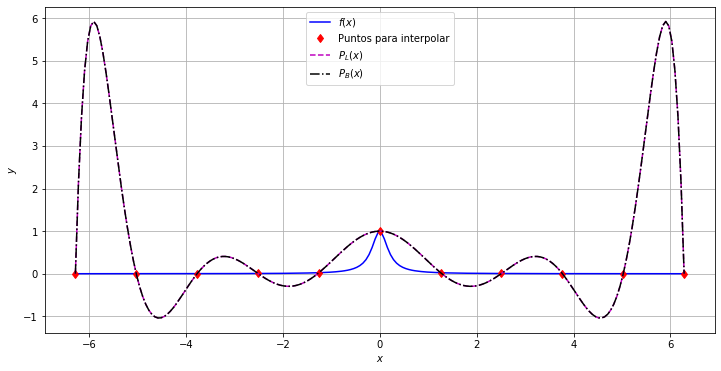

In [10]:
N_e = 200
x_e = np.linspace(x_a, x_b, N_e)
y_e = f(x_e)
plt.figure(figsize=(12, 6))
plt.plot(x_e, y_e, 'b-', label=r"$f(x)$")
plt.plot(x_i, y_i, 'rd', label="Puntos para interpolar")
plt.plot(x_e, Pl(x_e), 'm--', label=r'$P_L(x)$')
plt.plot(x_e, Pb(x_e), 'k-.', label=r'$P_B(x)$')
plt.grid(True)
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

## Comparar tiempo de evaluacion

Diseñe un experimento de manera que pueda mostrar la complejidad computacional en la **evaluación** de sus interpoladores. Recuerde que la complejidad de evaluar un polinomio utilizando Lagrange debería ser del orden $O(n^2)$ mientras que al usar Interpolación Baricéntrica $O(n)$.

In [11]:
x_a, x_b = -2 * np.pi, 2 * np.pi # Interpolation domain
N_exp = 5
Nt = 2 ** np.arange(3, 9)
N = Nt.shape[-1]
times_el = np.zeros(N)
times_eb = np.zeros(N)

In [14]:
for i in range(N):
    x = np.linspace(x_a, x_b, Nt[i])
    y = f(x)
    Pl = lagrange(x, y)
    Pb = barycentric(x, y)
    x_eval = np.random.randint(x_a, x_b, size = 100)
    start = time.time()
    for j in range(N_exp):
        Pl(x_eval)
    end = time.time()
    time_l = (end - start) / (N_exp * 100)

    start = time.time()
    for j in range(N_exp): 
        Pb(x_eval)
    end = time.time()
    time_b = (end - start) / (N_exp * 100)
    times_el[i] = time_l
    times_eb[i] = time_b

Para que pueda probar sus funciones se ponen a disposición las siguientes funciones:

# Visualización tiempos

Puede utilizar este código para visualizar los tiempos de evaluación.

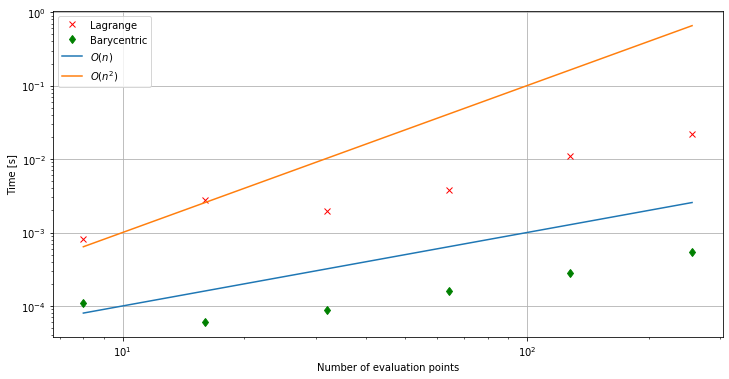

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(Nt, times_el, 'rx', label="Lagrange")
plt.plot(Nt, times_eb, 'gd', label="Barycentric")
plt.plot(Nt, 1e-5 * Nt, label=r"$O(n)$") # Puede ajustar el coeficiente 1e-4
plt.plot(Nt, 1e-5 * Nt ** 2, label=r"$O(n^2)$") # Puede ajustar el coeficiente 1e-4
plt.xscale('log')
plt.yscale('log')
plt.ylabel("Time [s]")
plt.xlabel("Number of evaluation points")
plt.grid(True)
plt.legend()
plt.show()